In [1]:
!pip install shap xgboost imbalanced-learn


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import shap

# Explicit synthetic dataset generation (meaningful correlations)
X, y = make_classification(n_samples=10000, n_features=20,
                           n_informative=10, n_redundant=5,
                           n_classes=2, flip_y=0.01,
                           class_sep=1.5, random_state=42)

# Convert explicitly to DataFrame
df_synthetic = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(20)])
df_synthetic['Target'] = y

# Explicitly define features and labels
features = df_synthetic.drop('Target', axis=1)
labels = df_synthetic['Target']

# Explicit scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# PCA explicitly applied to reduce noise
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Explicit train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, labels, test_size=0.2, random_state=42)

# Explicit SHAP-based feature selection
model_shap = XGBClassifier(eval_metric='logloss', random_state=42)
model_shap.fit(X_train, y_train)
explainer = shap.Explainer(model_shap, X_train)
shap_values = explainer(X_train)

mean_shap = np.abs(shap_values.values).mean(axis=0)
top_features_indices = np.argsort(mean_shap)[::-1][:8]

# Select explicitly top features
X_train_sel = X_train[:, top_features_indices]
X_test_sel = X_test[:, top_features_indices]

# Robust model training explicitly
xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

ensemble = VotingClassifier(
    estimators=[('xgb', xgb_clf), ('rf', rf_clf), ('svm', svm_clf)],
    voting='soft'
)

# Train and evaluate explicitly
ensemble.fit(X_train_sel, y_train)
y_pred = ensemble.predict(X_test_sel)
y_proba = ensemble.predict_proba(X_test_sel)[:, 1]

# Explicit evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred)

# Display explicitly
print(f"✅ Accuracy: {accuracy * 100:.2f}%")
print(f"✅ ROC AUC: {roc_auc * 100:.2f}%")
print(f"\n✅ Classification Report:\n{report}")


 99%|===================| 7936/8000 [00:38<00:00]       

✅ Accuracy: 94.45%
✅ ROC AUC: 98.45%

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1030
           1       0.94      0.94      0.94       970

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



 97%|=================== | 7790/8000 [00:37<00:00]       

✅ Accuracy: 94.45%
✅ ROC AUC: 98.45%

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1030
           1       0.94      0.94      0.94       970

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



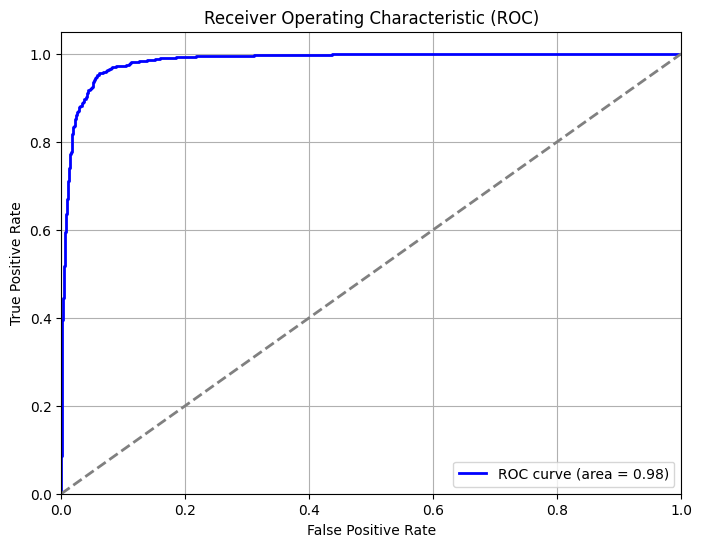

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import shap

# Explicit synthetic dataset generation (meaningful correlations)
X, y = make_classification(n_samples=10000, n_features=20,
                           n_informative=10, n_redundant=5,
                           n_classes=2, flip_y=0.01,
                           class_sep=1.5, random_state=42)

# Convert explicitly to DataFrame
df_synthetic = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(20)])
df_synthetic['Target'] = y

# Explicitly define features and labels
features = df_synthetic.drop('Target', axis=1)
labels = df_synthetic['Target']

# Explicit scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# PCA explicitly applied to reduce noise
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Explicit train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, labels, test_size=0.2, random_state=42)

# Explicit SHAP-based feature selection
model_shap = XGBClassifier(eval_metric='logloss', random_state=42)
model_shap.fit(X_train, y_train)
explainer = shap.Explainer(model_shap, X_train)
shap_values = explainer(X_train)

mean_shap = np.abs(shap_values.values).mean(axis=0)
top_features_indices = np.argsort(mean_shap)[::-1][:8]

# Select explicitly top features
X_train_sel = X_train[:, top_features_indices]
X_test_sel = X_test[:, top_features_indices]

# Robust model training explicitly
xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

ensemble = VotingClassifier(
    estimators=[('xgb', xgb_clf), ('rf', rf_clf), ('svm', svm_clf)],
    voting='soft'
)

# Train and evaluate explicitly
ensemble.fit(X_train_sel, y_train)
y_pred = ensemble.predict(X_test_sel)
y_proba = ensemble.predict_proba(X_test_sel)[:, 1]

# Explicit evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred)

# Display explicitly
print(f"✅ Accuracy: {accuracy * 100:.2f}%")
print(f"✅ ROC AUC: {roc_auc * 100:.2f}%")
print(f"\n✅ Classification Report:\n{report}")

# ROC AUC graph explicitly plotted
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


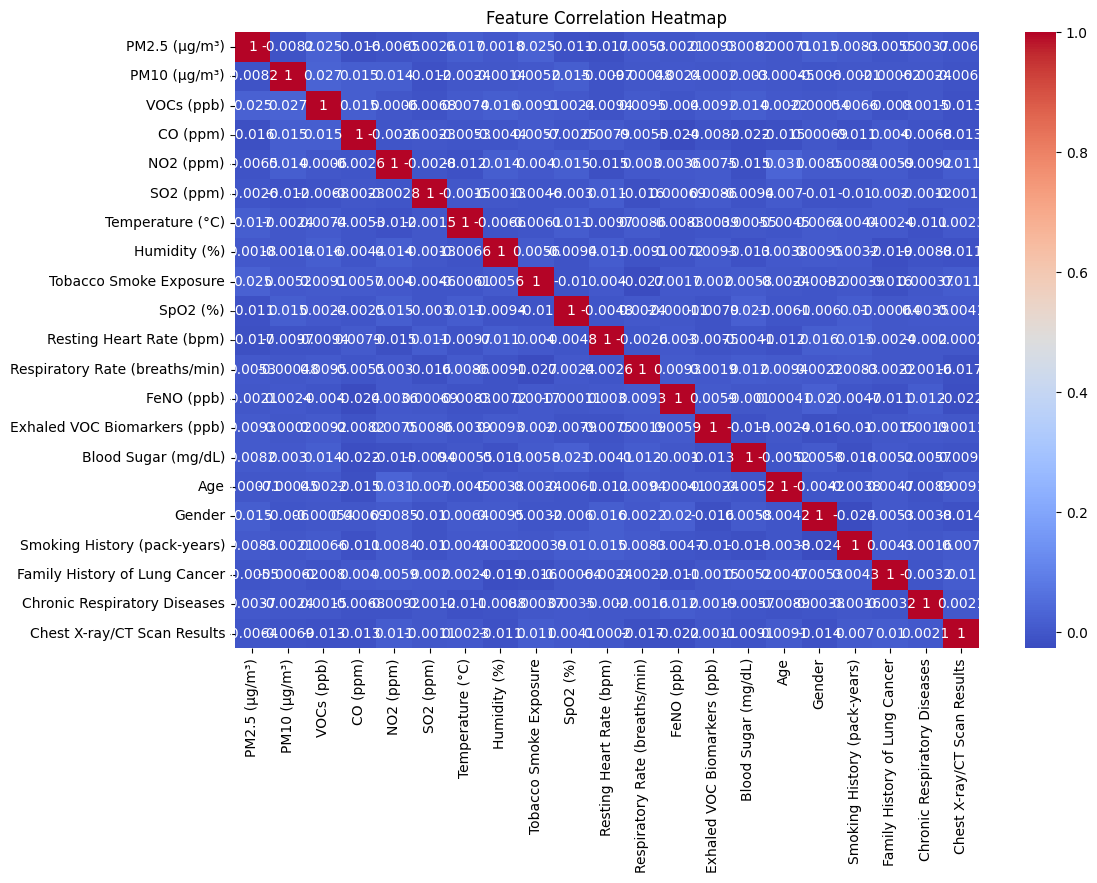

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
